# Working with data

In [4]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

Text(0.5, 1.0, 'Very Different Joint Distributions')

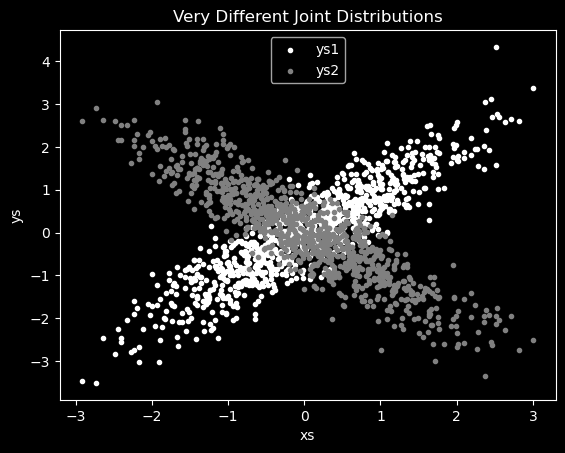

In [5]:
import random
from scratch.probability import inverse_normal_cdf


def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='white', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
# plt.show()

In [12]:
from scratch.statistics import correlation


assert 0.89 < correlation(xs, ys1) < 0.91
assert -0.91 < correlation(xs, ys2) < -0.89

from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


vectors = [xs, ys1, ys2]
correlation_matrix(vectors)

[[1.0, 0.8933366949950308, -0.8990210993559374],
 [0.8933366949950308, 1.0, -0.8128826794951244],
 [-0.8990210993559373, -0.8128826794951244, 1.0]]

In [15]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

In [17]:
stock_price

{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}

## NamedTuple

In [18]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [3]:
# caveat
from typing import NamedTuple

class Employee(NamedTuple):
    name: str
    id: int
    
employee = Employee('Alice', 123)
employee.name = 'Bob'  # This will raise an AttributeError because NamedTuple instances are immutable, contrary to dataclasses

AttributeError: can't set attribute

In [26]:
StockPrice.symbol # shows the index

_tuplegetter(0, 'Alias for field number 0')

In [29]:
price.date # shows the value

datetime.date(2018, 12, 14)

## Parser

good for Lists

In [38]:
from dateutil.parser import parse

datum = "vandaag is 2023-2-14"
p_datum = parse(datum, fuzzy=True).date() # this first does date+time, then date-only
p_datum

datetime.date(2023, 2, 14)

In [40]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),            # this is where the external module is used
                      closing_price=float(closing_price))

# Now test our function ON A LIST
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [41]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

In [43]:
import csv

with open("other/stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

# skip header
maybe_data = [try_parse_row(row) for row in rows]

# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]

data

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12

In [102]:
# another way
import csv

data: List[StockPrice] = []

with open("other/comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)
data        

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


[StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
 StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
 StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5),
 StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
 StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)]

In [44]:
max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")
max_aapl_price

232.070007

In [45]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 232.070007,
             'MSFT': 115.610001,
             'FB': 217.5,
             'GOOG': 1268.329956})

In [47]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

# define a new NamedTuple class
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

all_changes


[DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 16), pct_change=-0.07339392980372261),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 17), pct_change=0.0247531010683244),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 18), pct_change=0.02898362529055043),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 19), pct_change=0.061033219335108635),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 22), pct_change=0.04867344349646352),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 23), pct_change=0.04219327130645856),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 24), pct_change=0.052631865331493),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 26), pct_change=0.09230869964521826),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 29), pct_change=0.014083596112498542),
 DailyChange(symbol='AAPL', date=datetime.date(19

In [48]:
max_change = max(all_changes, key=lambda change: change.pct_change) # change is local
max_change

DailyChange(symbol='AAPL', date=datetime.date(1997, 8, 6), pct_change=0.33227854830957937)

In [68]:
all_changes.sort(key=lambda x: x.pct_change)
all_changes

[DailyChange(symbol='AAPL', date=datetime.date(2000, 9, 29), pct_change=-0.5186915679972073),
 DailyChange(symbol='MSFT', date=datetime.date(1987, 10, 19), pct_change=-0.3011588936357591),
 DailyChange(symbol='AAPL', date=datetime.date(1983, 9, 23), pct_change=-0.25384547786965617),
 DailyChange(symbol='AAPL', date=datetime.date(1987, 10, 19), pct_change=-0.2435234393406739),
 DailyChange(symbol='AAPL', date=datetime.date(1993, 7, 16), pct_change=-0.2307692910166621),
 DailyChange(symbol='AAPL', date=datetime.date(1987, 10, 26), pct_change=-0.21126751676253708),
 DailyChange(symbol='FB', date=datetime.date(2018, 7, 26), pct_change=-0.18960921839080458),
 DailyChange(symbol='MSFT', date=datetime.date(1987, 10, 26), pct_change=-0.1865287448256926),
 DailyChange(symbol='AAPL', date=datetime.date(2008, 9, 29), pct_change=-0.1791952510917031),
 DailyChange(symbol='AAPL', date=datetime.date(1997, 1, 6), pct_change=-0.17816103791777915),
 DailyChange(symbol='AAPL', date=datetime.date(2001, 7,

In [53]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}
for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes) 
    for month, changes in changes_by_month.items()
}

avg_daily_change

{1: 0.0021865911307884013,
 2: 0.00014320928359588448,
 3: 0.0009950657322022312,
 4: 0.0017246603289960414,
 5: 0.001045801424244935,
 6: -0.00038890680439638084,
 7: 0.0008653144845121465,
 8: 0.0012329314091353012,
 9: -4.63670330797049e-06,
 10: 0.002905423893850083,
 11: 0.0008081709427041247,
 12: 0.0009192394682663616}

In [58]:
# this is always useful: sort the dict using .items and key=lambda
best_month = sorted(avg_daily_change.items(),key=lambda x: x[1], reverse=True)
best_month

[(10, 0.002905423893850083),
 (1, 0.0021865911307884013),
 (4, 0.0017246603289960414),
 (8, 0.0012329314091353012),
 (5, 0.001045801424244935),
 (3, 0.0009950657322022312),
 (12, 0.0009192394682663616),
 (7, 0.0008653144845121465),
 (11, 0.0008081709427041247),
 (2, 0.00014320928359588448),
 (9, -4.63670330797049e-06),
 (6, -0.00038890680439638084)]

In [63]:
best_one = max(all_changes, key=lambda x: x.pct_change)
best_one

DailyChange(symbol='AAPL', date=datetime.date(1997, 8, 6), pct_change=0.33227854830957937)

## Vectors

This is an interesting way to get rid of units: everything is normalised so that each dimension has mean 0 and standard deviation 1.

Normalizing the data can help improve the performance and convergence of some machine learning algorithms, as well as make it easier to compare the importance of different features.

In [72]:
from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)

means, stdevs

([-1.0, 0.0, 1.0], [2.0, 1.0, 0.0])

We use the above to create a new dataset. This type of data preprocessing is useful to visualize the data, or when an algorithm requires input features to be within a specific range. 

Rescaling the data can be particularly helpful for algorithms that are sensitive to the scale of input features, such as *gradient descent-based methods* or distance-based algorithms like *k-Nearest Neighbors*.

In [73]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))

means, stdevs 

([0.0, 0.0, 1.0], [1.0, 1.0, 0.0])

## side note: tqdm



In [75]:
import tqdm
import random

for i in tqdm.tqdm(range(100)):
    [random.random() for _ in range(100000)]

100%|██████████| 100/100 [00:01<00:00, 80.89it/s]


In [78]:
with tqdm.trange(100) as t:
    for i in t:
        t.set_description('Processing %i' % i)

Processing 99: 100%|██████████| 100/100 [00:00<00:00, 1496.53it/s]


In [ ]:
# this one shows all the primes it processes
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it.
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

## Some probability distributions

Just to show how looking at similar datasets doesn't tell us much. A visualisation is a great first step.

In [4]:
import matplotlib as plt

# remove buffered variables
plt.gca().clear()
plt.close()

import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
            for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

AttributeError: module 'matplotlib' has no attribute 'gca'

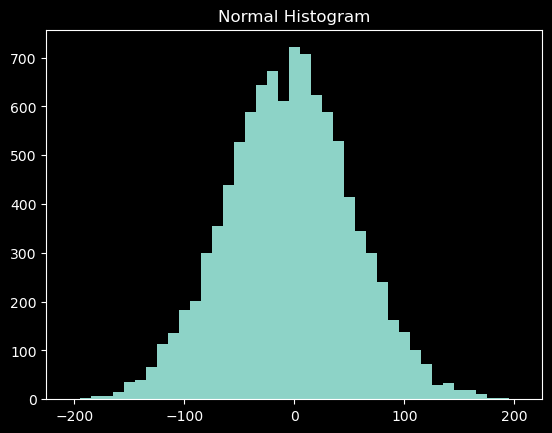

In [ ]:
plt.savefig('im/working_histogram_uniform.png')
plt.gca().clear()
plt.close()

plot_histogram(normal, 10, "Normal Histogram")

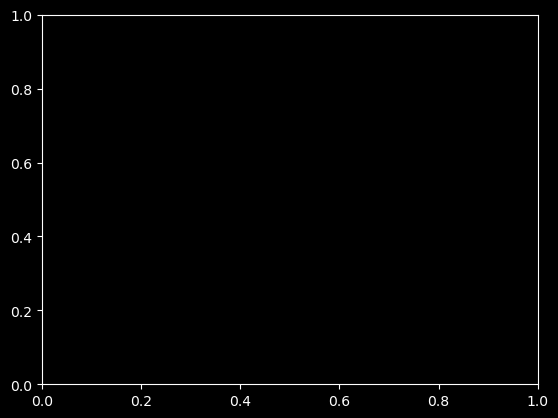

In [ ]:
plt.savefig('im/working_histogram_normal.png')
plt.gca().clear()    # gca = get current axes

Correlations are also important. On a scatterplot (in book but not here) we can see how they follow opposite directions.

In [ ]:
from scratch.statistics import correlation

print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9

0.8933366949950308
-0.8990210993559374


In [ ]:
normal

NameError: name 'normal' is not defined